In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [6]:
df.shape

(577462, 4)

In [7]:
# drop missing data
df.dropna(axis='index',how='any', subset=['AverageTemperature'],inplace=True)
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [8]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [9]:
dict={'Denmark (Europe)':'Denmark',
      'France (Europe)':'France',
      'Netherlands (Europe)':'Netherlands',
      'United Kingdom (Europe)':'United Kingdom',
     'Congo (Democratic Republic Of The)':'Congo'}
df['Country'] = df['Country'].replace(dict)

In [10]:
# calculate average temperature for each country
avg_temp = df.groupby(['Country'])['AverageTemperature'].mean().reset_index()
avg_temp.head()


,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [11]:
# !pip install chart_studio

In [12]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)


In [13]:
fig = px.choropleth(avg_temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Choropleth Map of AverageTemperature', template="plotly_dark")
fig.show()

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

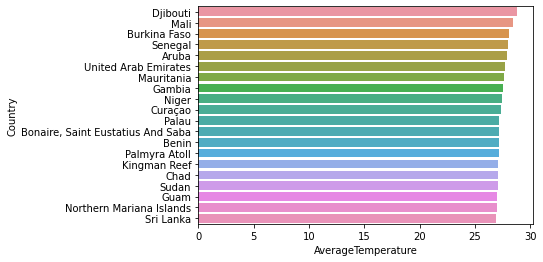

In [14]:
sns.barplot(x=avg_temp.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],y=avg_temp.sort_values(by='AverageTemperature',ascending=False)['Country'][0:20])

In [15]:
df2 = pd.read_csv("GlobalTemperatures.csv")
df2.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df2['dt'].unique()

array(['1750-01-01', '1750-02-01', '1750-03-01', ..., '2015-10-01',
       '2015-11-01', '2015-12-01'], dtype=object)

In [17]:
def split(x):
    return x.split('-')[0]


In [18]:

df2['years'] = df2['dt'].astype(str).apply(split)
df2['years'].unique()

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [19]:
df2.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [20]:
Avg_tempdata = df2.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})
Avg_tempdata.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250


In [21]:
#reset the index
Avg_tempdata = df2.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
Avg_tempdata.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [22]:
Avg_tempdata['Uncertainty top'] = Avg_tempdata['LandAverageTemperature'] + Avg_tempdata['LandAverageTemperatureUncertainty']
Avg_tempdata['Uncertainty bottom'] = Avg_tempdata['LandAverageTemperature'] - Avg_tempdata['LandAverageTemperatureUncertainty']
Avg_tempdata.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [23]:
import plotly.express as px
fig=px.line(Avg_tempdata, x='years',y=["Uncertainty top","Uncertainty bottom","LandAverageTemperature"],title="Average Land Temperature in World",template="plotly_dark")
fig.show()

From the charts you can see, that there is global warming nowadays.

In [24]:
df2['dt']=pd.to_datetime(df2['dt'])
df2['month'] = df2['dt'].dt.month
df2.drop('dt',axis=1,inplace=True)
df2.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [25]:
df2['month'].value_counts()

2     266
4     266
6     266
8     266
10    266
12    266
1     266
3     266
5     266
7     266
9     266
11    266
Name: month, dtype: int64

In [26]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [27]:
df2['season'] = df2['month'].apply(get_season)
years = df2['years'].unique() 

In [28]:
years

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [29]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    current_yr = df2[df2['years']==year]
    spring_temps.append(current_yr[current_yr['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season'] == 'winter']['LandAverageTemperature'].mean())
    

In [30]:
### lets make a dataframe of it
season=pd.DataFrame()
season['year']=years
season['spring_temp']=spring_temps
season['summer_temp']=summer_temps
season['autumn_temp']=autumn_temps
season['winter_temp']=winter_temps

In [31]:
season

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...,...
261,2011,9.190000,14.954667,10.026000,3.893333
262,2012,9.429667,14.762667,10.208000,3.629000
263,2013,9.166667,14.771000,10.278000,4.210333
264,2014,9.516333,14.694333,10.044667,4.027333


In [32]:
import plotly.express as px
fig=px.line(season,x="year",y=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'],title="Average Temperature in Each season", template="plotly_dark")
fig.show()

Analyse trend in temperature for top country

In [33]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [34]:
top_countries = ['Russia', 'United States', 'China', 'Japan', 'Australia', 'India']

In [35]:
df[df['Country'].isin(top_countries)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [36]:
top_countries_df = df[df['Country'].isin(top_countries)]
top_countries_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [37]:
top_countries_df['years'] = top_countries_df['dt'].apply(split)
top_countries_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
34816,1852-07-01,14.116,1.530,Australia,1852
34817,1852-08-01,15.330,1.400,Australia,1852
34818,1852-09-01,18.740,1.446,Australia,1852
34819,1852-10-01,21.984,1.493,Australia,1852
34820,1852-11-01,24.073,1.466,Australia,1852


In [38]:
avgtemp_top_countries = top_countries_df.groupby(['Country', 'years']).agg({'AverageTemperature':'mean'}).reset_index().sort_values('years', ascending=True)
avgtemp_top_countries

,Country,years,AverageTemperature
933,United States,1768,5.572750
934,United States,1769,10.446500
935,United States,1774,1.603000
936,United States,1775,9.499167
937,United States,1776,8.110000
...,...,...,...
161,Australia,2013,22.142875
730,Japan,2013,12.964750
557,India,2013,25.413250
932,Russia,2013,-2.263125


In [39]:
top_countries_df['years'].unique()

array(['1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859',
       '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867',
       '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875',
       '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883',
       '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891',
       '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899',
       '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907',
       '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915',
       '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923',
       '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931',
       '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939',
       '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947',
       '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
      

In [40]:
import plotly.express as px
%matplotlib inline
fig1=px.line(avgtemp_top_countries,x="years",y='AverageTemperature', color='Country', title="Average Temperature in each top countries", template="plotly_dark")
fig1.show()

Average temperature of United states

In [41]:
df3 = pd.read_csv('GlobalLandTemperaturesByState.csv')
df3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [42]:
df3['Country'].unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

In [43]:
UnitedState = df3['Country'] == 'United States'
UnitedState

0         False
1         False
2         False
3         False
4         False
          ...  
645670    False
645671    False
645672    False
645673    False
645674    False
Name: Country, Length: 645675, dtype: bool

In [44]:
UnitedState_df = df3[UnitedState]
UnitedState_df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States
...,...,...,...,...,...
626435,2013-05-01,10.607,0.208,Wyoming,United States
626436,2013-06-01,16.267,0.276,Wyoming,United States
626437,2013-07-01,20.222,0.133,Wyoming,United States
626438,2013-08-01,19.621,0.217,Wyoming,United States


In [45]:
UnitedState_df.isna().sum()

dt                                  0
AverageTemperature               7815
AverageTemperatureUncertainty    7815
State                               0
Country                             0
dtype: int64

In [46]:
UnitedState_df.dropna(inplace=True)

In [47]:
dict = {'Georgia (State)':'Georgia','District Of Columbia':'Columbia'}
UnitedState_df['State'] = UnitedState_df['State'].replace(dict)
UnitedState_df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [48]:
UnitedState_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7463,1744-04-01,19.075,2.902,Alabama,United States
7464,1744-05-01,21.197,2.844,Alabama,United States
7465,1744-06-01,25.290,2.879,Alabama,United States
7466,1744-07-01,26.420,2.841,Alabama,United States


In [49]:
# find the mean of the avearage temperature of the each states
UnitedStateTemp_df = UnitedState_df.groupby(['State'])['AverageTemperature'].mean().sort_values(ascending=True).reset_index()
UnitedStateTemp_df

,State,AverageTemperature
0,Alaska,-4.890738
1,North Dakota,4.169715
2,Maine,4.349942
3,Minnesota,4.472812
4,Montana,4.986482
5,Wyoming,5.099002
6,Idaho,5.334255
7,Vermont,5.398154
8,New Hampshire,5.612322
9,Wisconsin,5.946672


In [50]:
# !pip install opencage

You should consider upgrading via the 'c:\users\hp\anaconda3\python.exe -m pip install --upgrade pip' command.


In [51]:
from geopy.geocoders import Nominatim


In [52]:
geolocator=Nominatim(user_agent="app")#Nominatim is used to find longitude and latitude with respect to the location

In [54]:
lat=[]
lon=[]
for state in UnitedStateTemp_df['State']:
    state = geolocator.geocode(state)    
    if state is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(state.latitude)
        lon.append(state.longitude)

In [55]:
UnitedStateTemp_df['latitude'] = lat
UnitedStateTemp_df['longitude'] = lon
UnitedStateTemp_df.head()

,State,AverageTemperature,latitude,longitude
0,Alaska,-4.890738,64.445961,-149.680909
1,North Dakota,4.169715,47.620146,-100.540737
2,Maine,4.349942,45.709097,-68.859020
3,Minnesota,4.472812,45.989659,-94.611329
4,Montana,4.986482,47.375267,-109.638757


In [56]:
import folium
from folium.plugins import HeatMap
Mybasemap=folium.Map()

In [61]:
HeatMap(UnitedStateTemp_df[['latitude','longitude','AverageTemperature']],zoom=350,radius=15).add_to(Mybasemap)
Mybasemap

In [62]:
from opencage.geocoder import OpenCageGeocode

In [63]:
key = '28a6811b3c52474a92b4a7bd24417fee'  # get api key from:  https://opencagedata.com/api
geocoder = OpenCageGeocode(key)
random_location = 'Lagos, Nigeria'  
results = geocoder.geocode(random_location)
print (results)

[{'annotations': {'DMS': {'lat': "6° 27' 18.20700'' N", 'lng': "3° 23' 39.04620'' E"}, 'MGRS': '31NEH4358613524', 'Maidenhead': 'JJ16qk79hf', 'Mercator': {'x': 377838.334, 'y': 715298.294}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?node=27565124#map=16/6.45506/3.39418', 'note_url': 'https://www.openstreetmap.org/note/new#map=16/6.45506/3.39418&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=6.45506&mlon=3.39418#map=16/6.45506/3.39418'}, 'UN_M49': {'regions': {'AFRICA': '002', 'NG': '566', 'SUB-SAHARAN_AFRICA': '202', 'WESTERN_AFRICA': '011', 'WORLD': '001'}, 'statistical_groupings': ['LEDC']}, 'callingcode': 234, 'currency': {'alternate_symbols': [], 'decimal_mark': '.', 'html_entity': '&#x20A6;', 'iso_code': 'NGN', 'iso_numeric': '566', 'name': 'Nigerian Naira', 'smallest_denomination': 50, 'subunit': 'Kobo', 'subunit_to_unit': 100, 'symbol': '₦', 'symbol_first': 1, 'thousands_separator': ','}, 'flag': '🇳🇬', 'geohash': 's14ktppe6jgtv7rueb2p', 'qibla': 63.24, 'road

In [64]:
list_lat=[]
list_long=[]
for state in UnitedStateTemp_df['State']: # iterate over rows in dataframe
    results = geocoder.geocode(state)   
    latitude = results[0]['geometry']['lat']
    longitude = results[0]['geometry']['lng']

    list_lat.append(latitude)
    list_long.append(longitude)

In [65]:
UnitedStateTemp_df['latitude'] = list_lat
UnitedStateTemp_df['longitude'] = list_long
UnitedStateTemp_df.head()

,State,AverageTemperature,latitude,longitude
0,Alaska,-4.890738,64.445961,-149.680909
1,North Dakota,4.169715,47.620146,-100.540737
2,Maine,4.349942,45.709097,-68.859020
3,Minnesota,4.472812,45.989659,-94.611329
4,Montana,4.986482,47.375267,-109.638757


In [66]:
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [76]:

                                                    
HeatMap(UnitedStateTemp_df[['latitude','longitude','AverageTemperature']],zoom=350,radius=15).add_to(basemap)
basemap

In [77]:
cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [78]:
cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

Analyse average temperature of major nigeria cities by month

In [80]:
Nigeria = cities[cities['Country']=='Nigeria']
Nigeria

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
23960,1856-01-01,26.366,1.287,Aba,Nigeria,5.63N,8.07E
23961,1856-02-01,26.818,1.728,Aba,Nigeria,5.63N,8.07E
23962,1856-03-01,27.756,1.073,Aba,Nigeria,5.63N,8.07E
23963,1856-04-01,27.098,1.019,Aba,Nigeria,5.63N,8.07E
23964,1856-05-01,26.102,1.209,Aba,Nigeria,5.63N,8.07E
...,...,...,...,...,...,...,...
8503133,2013-05-01,28.074,0.850,Zaria,Nigeria,10.45N,7.36E
8503134,2013-06-01,26.069,0.960,Zaria,Nigeria,10.45N,7.36E
8503135,2013-07-01,25.264,0.421,Zaria,Nigeria,10.45N,7.36E
8503136,2013-08-01,23.871,0.259,Zaria,Nigeria,10.45N,7.36E


In [82]:
Nigeria['City'].count()

172347

In [83]:
Nigeria['City'].unique()

array(['Aba', 'Abakaliki', 'Abeokuta', 'Abuja', 'Akure', 'Amaigbo',
       'Awka', 'Azare', 'Bénin', 'Bama', 'Bauchi', 'Bida', 'Birnin Kebbi',
       'Bugama', 'Calabar', 'Damaturu', 'Ede', 'Ejigbo', 'Enugu',
       'Funtua', 'Gashua', 'Gboko', 'Gbongan', 'Gombe', 'Gusau',
       'Hadejia', 'Ibadan', 'Ife', 'Igboho', 'Ijero', 'Ikare', 'Ikere',
       'Ikire', 'Ikirun', 'Ikole', 'Ikorodu', 'Ikot Ekpene', 'Ila',
       'Ilawe', 'Ilesha', 'Ilobu', 'Ilorin', 'Inisa', 'Ise', 'Iseyin',
       'Iwo', 'Jalingo', 'Jimeta', 'Jos', 'Kaduna', 'Kano', 'Katsina',
       'Kishi', 'Lafia', 'Lafiagi', 'Lagos', 'Maiduguri', 'Makurdi',
       'Minna', 'Modakeke', 'Mubi', 'Nguru', 'Nkpor', 'Nnewi', 'Nsukka',
       'Obosi', 'Offa', 'Ogbomosho', 'Okrika', 'Ondo', 'Onitsha', 'Opobo',
       'Oron', 'Oshogbo', 'Otukpo', 'Owerri', 'Owo', 'Oyo', 'Pindiga',
       'Port Harcourt', 'Sapele', 'Shagamu', 'Shaki', 'Sokoto', 'Suleja',
       'Ugep', 'Umuahia', 'Uromi', 'Uyo', 'Warri', 'Zaria'], dtype=object)

In [84]:
Nigeria['Latitude'] = Nigeria['Latitude'].str.strip('N')
Nigeria['Longitude'] = Nigeria['Longitude'].str.strip('E')



In [85]:
Nigeria['dt']=pd.to_datetime(Nigeria['dt'])
Nigeria['month'] = Nigeria['dt'].dt.month
Nigeria.drop('dt',axis=1,inplace=True)
Nigeria.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,month
23960,26.366,1.287,Aba,Nigeria,5.63,8.07,1
23961,26.818,1.728,Aba,Nigeria,5.63,8.07,2
23962,27.756,1.073,Aba,Nigeria,5.63,8.07,3
23963,27.098,1.019,Aba,Nigeria,5.63,8.07,4
23964,26.102,1.209,Aba,Nigeria,5.63,8.07,5


In [93]:
cities_temp=Nigeria.groupby(['month','City'])['AverageTemperature'].mean().reset_index()
# cities_temp.columns=['month','City','Mean_temp']
cities_temp.head()


,month,City,AverageTemperature
0,1,Aba,26.439301
1,1,Abakaliki,26.439301
2,1,Abeokuta,26.861179
3,1,Abuja,25.475510
4,1,Akure,26.061566


In [94]:
df_merge=cities_temp.merge(Nigeria,on='City',how='left')
df_merge.head()

,month_x,City,AverageTemperature_x,AverageTemperature_y,AverageTemperatureUncertainty,Country,Latitude,Longitude,month_y
0,1,Aba,26.439301,26.366,1.287,Nigeria,5.63,8.07,1
1,1,Aba,26.439301,26.818,1.728,Nigeria,5.63,8.07,2
2,1,Aba,26.439301,27.756,1.073,Nigeria,5.63,8.07,3
3,1,Aba,26.439301,27.098,1.019,Nigeria,5.63,8.07,4
4,1,Aba,26.439301,26.102,1.209,Nigeria,5.63,8.07,5


In [96]:
data=df_merge.drop_duplicates(subset=['month_x','City'])
data

,month_x,City,AverageTemperature_x,AverageTemperature_y,AverageTemperatureUncertainty,Country,Latitude,Longitude,month_y
0,1,Aba,26.439301,26.366,1.287,Nigeria,5.63,8.07,1
1893,1,Abakaliki,26.439301,26.366,1.287,Nigeria,5.63,8.07,1
3786,1,Abeokuta,26.861179,26.901,1.359,Nigeria,7.23,4.05,1
5679,1,Abuja,25.475510,25.408,1.456,Nigeria,8.84,7.30,1
7572,1,Akure,26.061566,26.056,1.377,Nigeria,7.23,5.68,1
...,...,...,...,...,...,...,...,...,...
2058699,12,Umuahia,26.187028,26.366,1.287,Nigeria,5.63,8.07,1
2060592,12,Uromi,25.806734,26.056,1.377,Nigeria,7.23,5.68,1
2062485,12,Uyo,26.187028,26.366,1.287,Nigeria,5.63,8.07,1
2064378,12,Warri,26.502493,26.555,1.308,Nigeria,5.63,6.46,1


In [98]:
data2=data[['month_x','City','AverageTemperature_x','Country','Latitude','Longitude']]
data2.columns=['month','City','Mean_temp','Country','Latitude','Longitude']
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Aba,26.439301,Nigeria,5.63,8.07
1893,1,Abakaliki,26.439301,Nigeria,5.63,8.07
3786,1,Abeokuta,26.861179,Nigeria,7.23,4.05
5679,1,Abuja,25.475510,Nigeria,8.84,7.30
7572,1,Akure,26.061566,Nigeria,7.23,5.68


In [99]:
trace = go.Heatmap(z=data2['Mean_temp'],
                   x=data2['month'],
                   y=data2['City'],
                  colorscale='Viridis')

In [102]:
data3=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities in Nigeria By Month',
)
fig4 = go.Figure(data=data3, layout=layout)
fig4.show()

In [108]:
import folium
from folium.plugins import HeatMap
basemap1=folium.Map()

                                                    
HeatMap(data2[['Latitude','Longitude','Mean_temp']],zoom=50,radius=15).add_to(basemap1)
basemap1

In [110]:
from folium.plugins import FastMarkerCluster
FastMarkerCluster(data=data2[['Latitude','Longitude','Mean_temp']].values.tolist()).add_to(basemap1)
basemap1

In [112]:
for id,row in data2.iterrows():
#     print(id)
    print(row)


month                1
City               Aba
Mean_temp    26.439301
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 0, dtype: object
month                1
City         Abakaliki
Mean_temp    26.439301
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 1893, dtype: object
month                1
City          Abeokuta
Mean_temp    26.861179
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 3786, dtype: object
month               1
City            Abuja
Mean_temp    25.47551
Country       Nigeria
Latitude         8.84
Longitude        7.30
Name: 5679, dtype: object
month                1
City             Akure
Mean_temp    26.061566
Country        Nigeria
Latitude          7.23
Longitude         5.68
Name: 7572, dtype: object
month                1
City           Amaigbo
Mean_temp    26.439301
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 9465, dtype: object
month                1
Ci

Name: 477288, dtype: object
month                3
City             Opobo
Mean_temp    26.974021
Country        Nigeria
Latitude          4.02
Longitude         7.23
Name: 479181, dtype: object
month                3
City              Oron
Mean_temp    28.322952
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 481074, dtype: object
month                3
City           Oshogbo
Mean_temp    28.456055
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 482967, dtype: object
month               3
City           Otukpo
Mean_temp    29.83163
Country       Nigeria
Latitude         7.23
Longitude        8.92
Name: 484860, dtype: object
month                3
City            Owerri
Mean_temp    28.245295
Country        Nigeria
Latitude          5.63
Longitude         6.46
Name: 486753, dtype: object
month                3
City               Owo
Mean_temp    28.188786
Country        Nigeria
Latitude          7.23
Longitude         5.68
Name: 4886

month                5
City             Ilawe
Mean_temp    26.548103
Country        Nigeria
Latitude          7.23
Longitude         5.68
Name: 761322, dtype: object
month                5
City            Ilesha
Mean_temp    27.373747
Country        Nigeria
Latitude          8.84
Longitude         4.05
Name: 763215, dtype: object
month                5
City             Ilobu
Mean_temp    26.760363
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 765108, dtype: object
month                5
City            Ilorin
Mean_temp    27.373747
Country        Nigeria
Latitude          8.84
Longitude         4.05
Name: 767001, dtype: object
month                5
City             Inisa
Mean_temp    26.760363
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 768894, dtype: object
month                5
City               Ise
Mean_temp    26.548103
Country        Nigeria
Latitude          7.23
Longitude         5.68
Name: 770787, dtype: object
mont

Name: 1024617, dtype: object
month              6
City           Uromi
Mean_temp    25.5025
Country      Nigeria
Latitude        7.23
Longitude       5.68
Name: 1026510, dtype: object
month                6
City               Uyo
Mean_temp    26.261266
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 1028403, dtype: object
month                6
City             Warri
Mean_temp    26.213168
Country        Nigeria
Latitude          5.63
Longitude         6.46
Name: 1030296, dtype: object
month                6
City             Zaria
Mean_temp    25.871831
Country        Nigeria
Latitude         10.45
Longitude         7.36
Name: 1032189, dtype: object
month                7
City               Aba
Mean_temp    25.595111
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 1034082, dtype: object
month                7
City         Abakaliki
Mean_temp    25.595111
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 1035

month                9
City             Ilobu
Mean_temp    24.906305
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 1454496, dtype: object
month                9
City            Ilorin
Mean_temp    25.045142
Country        Nigeria
Latitude          8.84
Longitude         4.05
Name: 1456389, dtype: object
month                9
City             Inisa
Mean_temp    24.906305
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 1458282, dtype: object
month                9
City               Ise
Mean_temp    24.846418
Country        Nigeria
Latitude          7.23
Longitude         5.68
Name: 1460175, dtype: object
month                9
City            Iseyin
Mean_temp    24.906305
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 1462068, dtype: object
month                9
City               Iwo
Mean_temp    24.906305
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 1463961, dtype: objec

month               10
City           Gbongan
Mean_temp    25.693366
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 1592769, dtype: object
month               10
City             Gombe
Mean_temp    27.045901
Country        Nigeria
Latitude         10.45
Longitude        10.64
Name: 1594662, dtype: object
month               10
City             Gusau
Mean_temp    26.731486
Country        Nigeria
Latitude         12.05
Longitude         6.58
Name: 1596555, dtype: object
month               10
City           Hadejia
Mean_temp    27.767317
Country        Nigeria
Latitude         12.05
Longitude         9.86
Name: 1598448, dtype: object
month               10
City            Ibadan
Mean_temp    25.693366
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 1600341, dtype: object
month               10
City               Ife
Mean_temp    25.693366
Country        Nigeria
Latitude          7.23
Longitude         4.05
Name: 1602234, dtype: objec

Name: 1740507, dtype: object
month              11
City             Bida
Mean_temp    27.03931
Country       Nigeria
Latitude         8.84
Longitude        5.68
Name: 1742400, dtype: object
month                  11
City         Birnin Kebbi
Mean_temp       26.500542
Country           Nigeria
Latitude            12.05
Longitude            4.93
Name: 1744293, dtype: object
month               11
City            Bugama
Mean_temp    26.504007
Country        Nigeria
Latitude          4.02
Longitude         7.23
Name: 1746186, dtype: object
month               11
City             Bénin
Mean_temp    26.242408
Country        Nigeria
Latitude          7.23
Longitude         5.68
Name: 1748079, dtype: object
month               11
City           Calabar
Mean_temp    26.623657
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 1749972, dtype: object
month               11
City          Damaturu
Mean_temp    26.460915
Country        Nigeria
Latitude         12.05
Longitude

month               12
City            Sokoto
Mean_temp    23.809217
Country        Nigeria
Latitude         13.66
Longitude         5.78
Name: 2053020, dtype: object
month               12
City            Suleja
Mean_temp    24.996357
Country        Nigeria
Latitude          8.84
Longitude         7.30
Name: 2054913, dtype: object
month               12
City              Ugep
Mean_temp    26.187028
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 2056806, dtype: object
month               12
City           Umuahia
Mean_temp    26.187028
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 2058699, dtype: object
month               12
City             Uromi
Mean_temp    25.806734
Country        Nigeria
Latitude          7.23
Longitude         5.68
Name: 2060592, dtype: object
month               12
City               Uyo
Mean_temp    26.187028
Country        Nigeria
Latitude          5.63
Longitude         8.07
Name: 2062485, dtype: objec

In [120]:
import folium
from folium.plugins import HeatMap
basemap2=folium.Map()
# Add points to the map
for id,row in data2.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row['Mean_temp']).add_to(basemap2)
basemap2



In [118]:
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Aba,26.439301,Nigeria,5.63,8.07
1893,1,Abakaliki,26.439301,Nigeria,5.63,8.07
3786,1,Abeokuta,26.861179,Nigeria,7.23,4.05
5679,1,Abuja,25.475510,Nigeria,8.84,7.30
7572,1,Akure,26.061566,Nigeria,7.23,5.68
